I mimic codes in [Newton's method | Exact Line Search | Theory and Python Code | Optimization Algorithms #1](https://www.youtube.com/watch?v=qt6Xad7lX_4) and add some useful comments. 

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import *
import sys
import sympy as sy

In [39]:
## Exact Line Search Method
def ExactLineSearchMethod(f, x, alpha, p ):
  condition = np.dot(f(x + alpha*p), p) == 0
  return condition

## Damped Newton Method + Exact Line Search Method
def DampedNewtonMethodExactLineSearch(f, g, h, x0):
  # f is f(x) we are optimizing
  # g is the gradient of f
  # h is the hessian of f
  # x0 is the initial point

  maxNoOfIterations = 500
  rho = 0.55 # 0 < rho < 1
  k = 0 # iteration counter
  epsilon = 1e-5 # 0.00001
  
  while k < maxNoOfIterations:
    gk = g(x0)
    Hk = h(x0)
    dk = -1.0*np.linalg.solve(Hk, gk) # search direction
    if np.linalg.norm(dk) < epsilon:
      break
    m =0
    mk = 0
    while m < 20:
      if ExactLineSearchMethod(g, x0, rho**m, dk):
        mk = m
        break
      m += 1
    
    # update x0 (initial point) and decrease the step size
    x0 = x0 + rho**mk*dk
    
    # update the iteration counter
    k += 1

    print("===== Damped Newton + Exact Line Search Method =====")
    print("xk = ", x0)
    print("f(xk) = ", round(f(x0), 3))
    print("No. of Iterations = ", k)

## Testing 
f_counter = 0 # number of times f was called
g_counter = 0 # number of times g was called
H_counter = 0 # number of times H was called

x = sy.IndexedBase('x')

n = 2

# define the functions; functions do not work because variables are not adapted to them
fexpr = 100*(x[0]**2 - x[1])**2 + (x[0]- 1)**2 # objective function
gexpr = [sy.diff(fexpr, x[i]) for i in range(n)] # gradient of the objective function
Hexpr = [[sy.diff(g, x[i]) for i in range(n)] for g in gexpr] # hessian of the objective function

# define the functions
flambdify = sy.lambdify(x, fexpr, modules='numpy')
glambdify = [sy.lambdify(x, gf, modules='numpy') for gf in gexpr]
Hlambdify = [[sy.lambdify(x, gf, modules='numpy') for gf in Hs] for Hs in Hexpr]

def fun(x):
  global f_counter
  f_counter += 1
  return flambdify(x)
def gfun(x):
  global g_counter
  g_counter += 1
  return np.array([gf(x) for gf in glambdify])
def hess(y):
  global H_counter
  H_counter += 1
  return np.array([[gf(y) for gf in Hs] for Hs in Hlambdify])



In [38]:
DampedNewtonMethodExactLineSearch(fun, gfun, hess, np.random.normal(0, 1, n))

===== Damped Newton + Exact Line Search Method =====
xk =  [-0.85039724  0.71344233]
f(xk) =  3.433
No. of Iterations =  1
===== Damped Newton + Exact Line Search Method =====
xk =  [-0.22242576 -0.34487496]
f(xk) =  17.045
No. of Iterations =  2
===== Damped Newton + Exact Line Search Method =====
xk =  [-0.20712049  0.04266465]
f(xk) =  1.457
No. of Iterations =  3
===== Damped Newton + Exact Line Search Method =====
xk =  [ 0.94597713 -0.4347614 ]
f(xk) =  176.796
No. of Iterations =  4
===== Damped Newton + Exact Line Search Method =====
xk =  [0.94617952 0.89525564]
f(xk) =  0.003
No. of Iterations =  5
===== Damped Newton + Exact Line Search Method =====
xk =  [0.99999956 0.99710252]
f(xk) =  0.001
No. of Iterations =  6
===== Damped Newton + Exact Line Search Method =====
xk =  [0.99999984 0.99999968]
f(xk) =  0.0
No. of Iterations =  7


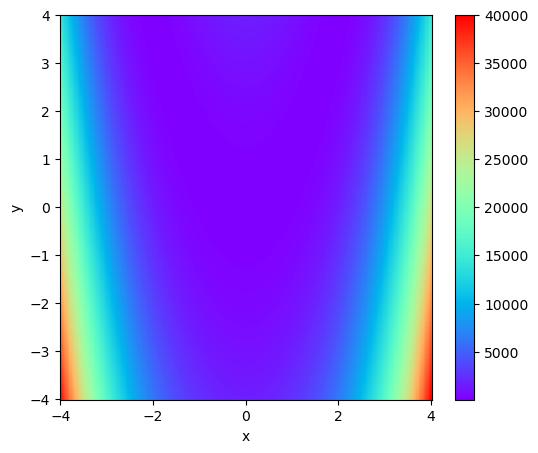

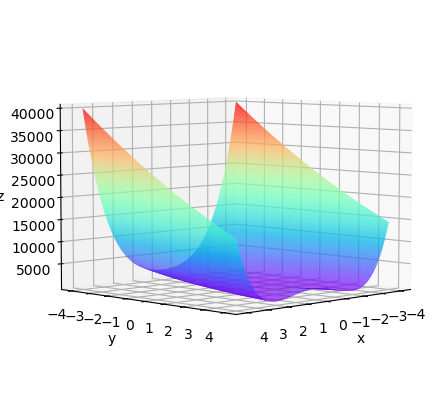

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import tkinter as tk
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
import matplotlib.colors

## 3Dで2変数実数値関数を表示する
# f(x,y) = sqrt(x^2+y^2)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [6, 5]

num = 301
a = 1
b = 4
x = np.linspace(-b*a, b*a ,num)
y = np.linspace(-b*a, b*a, num)
X,Y = np.meshgrid(x, y)

Z = []
Z = 100*(X**2 - Y)**2 + (X- 1)**2

for m1 in range(num):
    for m2 in range(num):
        if Y[m1][m2] >= 0:
            Z[m1][m2] = 100*(X[m1][m2]**2 - Y[m1][m2])**2 + (X[m1][m2]- 1)**2

fig = plt.figure()
ax = plt.axes()
plt.pcolor(X, Y, Z, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="rainbow")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=5, azim=45)

plt.show()